# Practico Mentoria - Analisis y Visualizacion de Datos

---

### Importaciones

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import variation, zscore, kstest, norm

from collections import OrderedDict
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("whitegrid")
sns.set_context('talk')

In [3]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

### Carga de los Datesets

In [4]:
df_player = pd.read_csv('./Datasets/football_player.csv')
df_team = pd.read_csv('./Datasets/football_team.csv')
df_match = pd.read_csv('./Datasets/football_match.csv')

### Exploremos un poco los Datasets

> #### Players Dataset

In [5]:
print("Shape = {}".format(df_player.shape))

Shape = (9925, 44)


In [6]:
df_player.sample(10)

,player_name,birthday,age,height_m,weight_kg,imc,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
858,Ariel Borysiuk,1991-07-29,24,1.80,69.85,21.48,66.12,74.38,right,medium,...,70.46,49.21,51.58,63.58,63.08,12.71,13.04,18.71,15.54,13.04
8529,Sava Miladinovic Bento,1991-01-02,25,1.83,72.12,21.56,58.00,64.43,right,medium,...,59.64,49.50,41.64,46.57,40.07,8.00,8.00,8.00,7.00,14.00
2527,Dusan Tadic,1988-11-20,27,1.80,76.20,23.43,78.16,81.88,left,medium,...,84.32,76.28,39.96,35.56,27.56,10.16,10.16,12.56,8.16,15.16
8473,Samuel Souprayen,1989-02-18,27,1.88,74.84,21.18,64.24,71.76,left,medium,...,46.52,42.71,65.62,65.19,66.90,8.33,10.95,15.19,14.19,14.19
1958,Daniele Croce,1982-09-09,33,1.73,68.04,22.81,67.68,67.68,right,high,...,68.47,59.74,52.26,56.89,59.53,11.74,11.74,5.74,7.74,12.74
4555,John Arne Riise,1980-09-24,35,1.88,82.10,23.24,76.32,77.64,left,high,...,64.14,70.59,75.45,79.59,80.59,13.27,10.09,33.14,13.50,13.68
8408,Saidy Janko,1995-10-22,20,1.78,69.85,22.10,62.13,76.53,right,high,...,41.00,51.20,58.53,65.87,64.60,5.27,9.27,7.27,13.27,7.27
3743,Helder Postiga,1982-08-02,33,1.80,76.20,23.43,76.04,76.93,right,high,...,67.15,70.59,25.37,28.11,27.19,12.00,9.81,20.67,16.37,14.59
2314,Denzel Slager,1993-05-02,23,1.83,81.19,24.28,61.50,70.75,left,high,...,47.00,50.00,20.62,20.00,21.00,14.00,8.00,11.00,11.00,15.00
2992,Fernando Marcal,1989-02-19,27,1.78,72.12,22.81,70.88,75.41,left,high,...,51.53,42.35,65.47,70.00,71.53,5.35,10.35,13.35,12.35,10.35


In [7]:
df_player.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

> #### Teams Dataset

In [8]:
print("Shape = {}".format(df_team.shape))

Shape = (288, 22)


In [9]:
df_team.sample(10)

,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
276,BSC Young Boys,YB,53.83,Balanced,Little,63.00,Mixed,Organised,46.00,Normal,...,52.00,Normal,Organised,46.50,Medium,40.00,Press,53.50,Normal,Cover
98,VfL Wolfsburg,WOL,61.33,Balanced,Little,51.33,Mixed,Organised,67.00,Risky,...,57.17,Normal,Organised,55.00,Medium,47.17,Press,53.00,Normal,Cover
186,Widzew Łódź,LOD,65.25,Balanced,Little,62.75,Long,Organised,56.75,Normal,...,53.00,Normal,Organised,34.25,Deep,42.75,Press,59.00,Normal,Cover
73,FC Sochaux-Montbéliard,SOC,61.33,Balanced,Little,46.00,Mixed,Organised,53.67,Normal,...,46.83,Normal,Organised,54.33,Medium,42.83,Press,54.33,Normal,Cover
269,RC Celta de Vigo,CEL,48.67,Balanced,Little,49.67,Mixed,Organised,52.67,Normal,...,56.00,Normal,Organised,42.67,Medium,47.00,Press,59.50,Normal,Cover
226,Heart of Midlothian,HEA,59.60,Balanced,Little,60.00,Mixed,Organised,58.40,Normal,...,64.00,Normal,Organised,53.40,Medium,59.00,Press,61.40,Normal,Cover
35,Middlesbrough,MID,62.67,Balanced,Little,55.83,Mixed,Organised,51.00,Normal,...,56.00,Normal,Organised,39.33,Medium,47.00,Press,42.83,Normal,Cover
154,Vitesse,VIT,42.00,Balanced,Little,39.00,Mixed,Organised,53.83,Normal,...,59.83,Normal,Organised,45.17,Medium,50.17,Press,52.33,Normal,Cover
253,Real Betis Balompié,BET,52.33,Balanced,Little,40.67,Mixed,Organised,55.67,Normal,...,56.50,Normal,Organised,54.00,Medium,46.83,Press,56.67,Normal,Cover
108,Karlsruher SC,KAR,57.40,Balanced,Little,47.40,Mixed,Organised,60.00,Normal,...,54.60,Normal,Organised,43.40,Medium,44.80,Press,45.40,Normal,Cover


In [10]:
df_team.dtypes

team_long_name                     object
team_short_name                    object
buildUpPlaySpeed                  float64
buildUpPlaySpeedClass              object
buildUpPlayDribblingClass          object
buildUpPlayPassing                float64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing             float64
chanceCreationPassingClass         object
chanceCreationCrossing            float64
chanceCreationCrossingClass        object
chanceCreationShooting            float64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                   float64
defencePressureClass               object
defenceAggression                 float64
defenceAggressionClass             object
defenceTeamWidth                  float64
defenceTeamWidthClass              object
defenceDefenderLineClass           object
dtype: object

> #### Matchs Dataset

In [11]:
print("Shape = {}".format(df_match.shape))

Shape = (25979, 15)


In [12]:
df_match.sample(10)

,country_name,league_name,season,stage,date,home_team_long_name,home_short_long_name,away_team_long_name,away_short_long_name,home_team_goal,away_team_goal,total_goal,B365H,B365D,B365A
15289,Netherlands,Netherlands Eredivisie,2014/2015,28,2015-03-20,FC Utrecht,UTR,NAC Breda,NAC,3,4,7,1.50,3.9,7.00
6697,France,France Ligue 1,2013/2014,11,2013-10-26,Valenciennes FC,VAL,Évian Thonon Gaillard FC,ETG,0,1,1,2.00,3.3,3.80
15489,Netherlands,Netherlands Eredivisie,2015/2016,17,2015-12-19,Heracles Almelo,HER,FC Groningen,GRO,2,1,3,2.20,3.4,3.20
2579,England,England Premier League,2010/2011,18,2011-01-26,Liverpool,LIV,Fulham,FUL,1,0,1,1.53,3.8,7.00
10264,Italy,Italy Serie A,2008/2009,1,2008-08-31,Torino,TOR,Lecce,LEC,3,0,3,1.80,3.1,5.25
17444,Poland,Poland Ekstraklasa,2015/2016,14,2015-10-30,Górnik Łęczna,LEC,Cracovia,CKR,1,0,1,NaN,NaN,NaN
11088,Italy,Italy Serie A,2010/2011,16,2010-12-12,Brescia,BRE,Sampdoria,SAM,1,0,1,2.90,3.1,2.55
467,Belgium,Belgium Jupiler League,2009/2010,30,2010-03-21,Standard de Liège,STL,KAA Gent,GEN,0,2,2,1.85,3.6,4.00
17525,Poland,Poland Ekstraklasa,2015/2016,23,2016-02-21,Polonia Bytom,GOR,Ruch Chorzów,CHO,0,2,2,NaN,NaN,NaN
15773,Poland,Poland Ekstraklasa,2008/2009,15,2008-11-22,GKS Bełchatów,BEL,Jagiellonia Białystok,BIA,2,0,2,NaN,NaN,NaN


***Interpretacion***



In [13]:
df_match.dtypes

country_name             object
league_name              object
season                   object
stage                     int64
date                     object
home_team_long_name      object
home_short_long_name     object
away_team_long_name      object
away_short_long_name     object
home_team_goal            int64
away_team_goal            int64
total_goal                int64
B365H                   float64
B365D                   float64
B365A                   float64
dtype: object

---

### **Ejercicios**

> Ejercicio 1

Calcular Estadisticos como son:
* Moda
* Media
* Mediana
* Desviacion Estandar
* Minimo y Maximo

de variables como el 'Shot Power' y 'Long Shots de los jugadores.

Ver si responden a alguna distribución conocida.

#### Shot Power - Estadisticos:

In [14]:
# Primero realizamos una pequeña limpieza, eliminando los datos NaN
shot_power_clean = df_player["shot_power"].dropna()

shot_power_clean.describe()

count    9925.000000
mean       59.672008
std        15.287306
min         9.920000
25%        52.270000
50%        63.030000
75%        70.570000
max        93.080000
Name: shot_power, dtype: float64

#### Shot Power - Histograma:

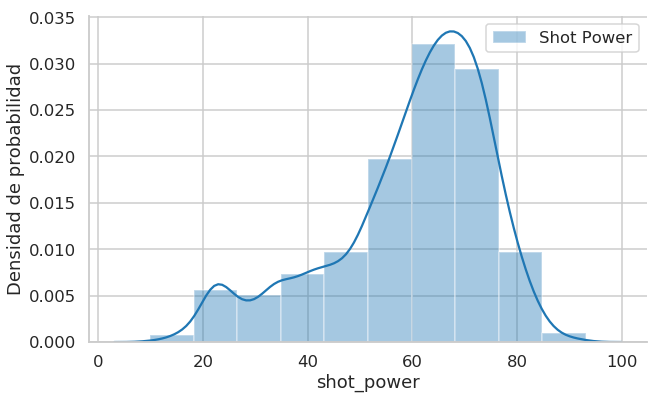

In [15]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del "shot_power"
sns.distplot(shot_power_clean, kde=True, bins=10, label='Shot Power')
sns.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

***Interpretacion***

Parece seguir una distribucion normal con un cierto sesgo hacia la derecha.

#### Long Shots  - Estadisticos:

In [16]:
# Primero realizamos una pequeña limpieza, eliminando los datos NaN
long_shots_clean = df_player["long_shots"].dropna()

long_shots_clean.describe()

count    9925.000000
mean       50.919684
std        17.356235
min         6.000000
25%        38.800000
50%        55.150000
75%        64.040000
max        89.880000
Name: long_shots, dtype: float64

#### Long Shots  - Histograma:

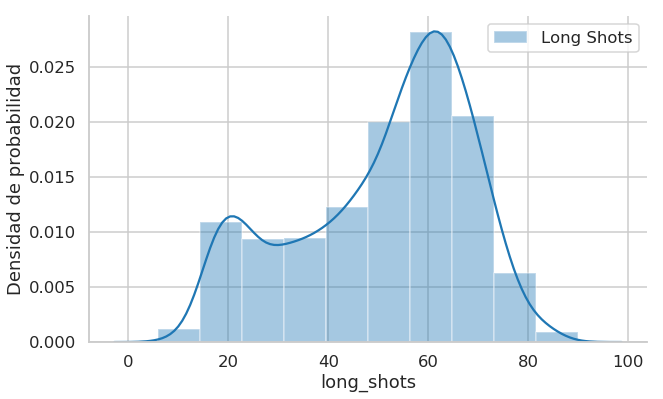

In [17]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del "long_shots"
sns.distplot(long_shots_clean, kde=True, bins=10, label='Long Shots')
sns.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

***Interpretacion***

Pareceria que son 2 distribuciones normales superpuestas. Una con media 20 y otra con media 60 aproximadamente.

___________________________________________________
> Ejercicio 2

Realizar un Análisis de valores atípicos (outliers) de las variables anteriores.

#### Shot Power - Outliers: BoxPlot

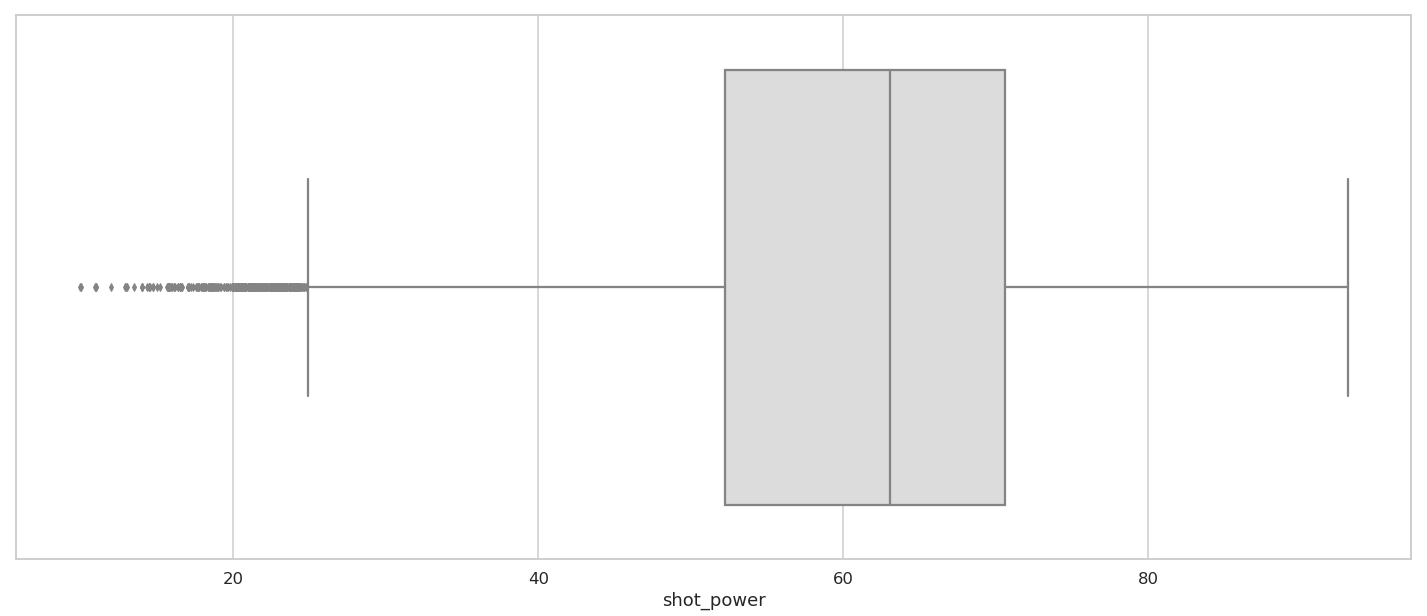

In [18]:
## Box plot para "shot_power"

plt.figure(figsize=(25,10))
sns.boxplot(df_player["shot_power"], palette="coolwarm")

#### Shot Power - Outliers: Z-Score

In [19]:
## Z-Score para "shot_power"

df_player["shot_power_zscore"] = zscore(df_player["shot_power"])

shot_power_zscore_outliers = df_player["shot_power_zscore"].apply(
    ## Si zscore es menor 2.5 o mayor a 2.5, el valor observado esta en el 5% mas chico o mas grande.
  lambda x: x <= -2.5 or x >= 2.5
)
print("Promedio shot_power: ", shot_power_clean.mean())

df_player[shot_power_zscore_outliers][["player_name", "shot_power", "age", "height_m"]].sort_values("shot_power", ascending=True)

Promedio shot_power:  59.67200806045352


,player_name,shot_power,age,height_m
1310,Bruno Verissimo,9.92,40,1.73
3691,Hans-Peter Berger,10.00,34,1.78
4084,Jakub Szumski,10.95,24,1.93
3223,Fredric Loehe,11.00,27,1.93
7915,Raul Dominguez,11.00,29,1.80
8351,Rui Rego,12.00,35,1.75
2525,Dusan Pernis,12.90,31,1.90
3443,Giedrius Arlauskis,12.93,28,1.83
4796,Jose Picon,13.00,28,1.83
7957,Renan,13.46,25,1.90


***Interpretacion***

Vemos como tanto en el boxpolot como en los resultados arrojados por el zscore, los outliers de *shot_power* se ubican por debajo de la media. Para ser exacto hay 189 jugadores que se pueden considerar outliers.

#### Long Shots  - Outliers: BoxPlot

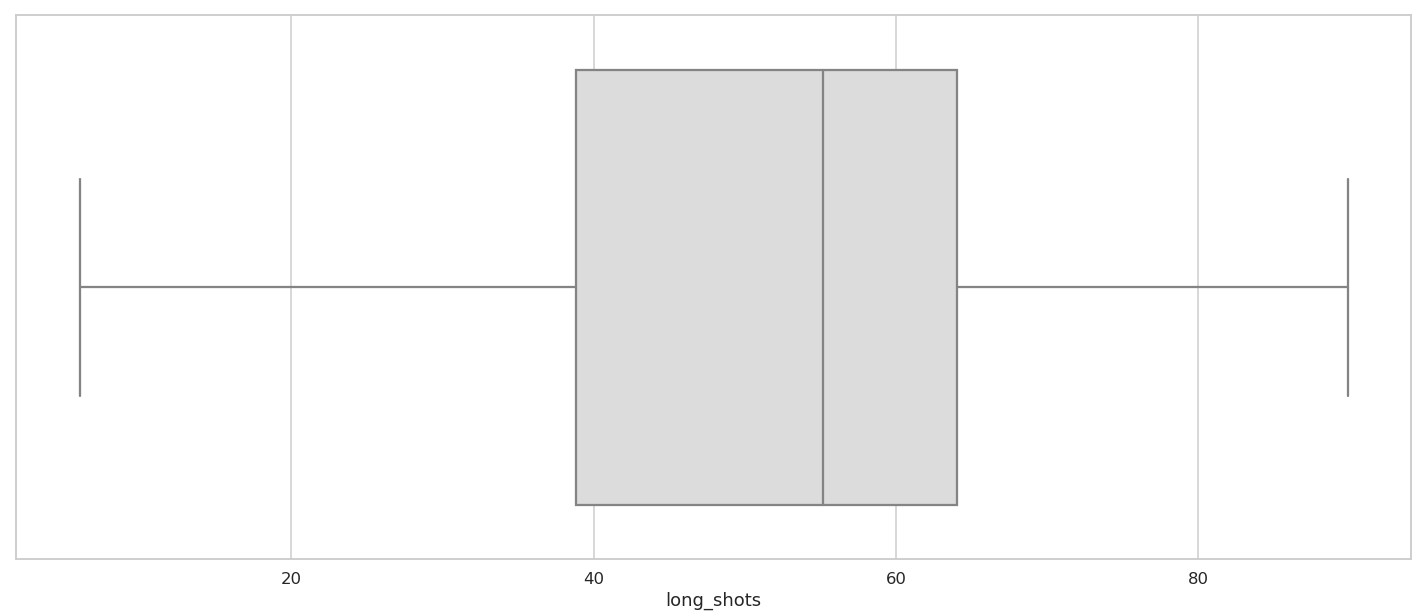

In [20]:
## Box plot para "long_shots"
plt.figure(figsize=(25,10))
sns.boxplot(df_player["long_shots"], palette="coolwarm")

#### Long Shots - Outliers: Z-Score

In [21]:
## Z-Szore para "long_shots"

df_player["long_shots_zscore"] = zscore(df_player["long_shots"])

long_shots_zscore_outliers = df_player["long_shots_zscore"].apply(
    ## Si zscore es menor 2.5 o mayor a 2.5, el valor observado esta en el 5% mas chico o mas grande.
  lambda x: x <= -2.5 or x >= 2.5
)
print("Promedio long_shots: ", long_shots_clean.mean())

df_player[long_shots_zscore_outliers][["player_name", "long_shots", "age", "height_m"]].sort_values("long_shots", ascending=True)

Promedio long_shots:  50.91968362720401


,player_name,long_shots,age,height_m
6745,Miguel Silva,6.00,21,1.88
4840,Josip Posavec,7.00,20,1.90
8266,Ronan Le Crom,7.43,41,1.85


***Interpretacion***

Contrariamente al caso de *shot_power*, el boxpolot para la variable *long_shots* no arroja outliers, sin embargo tras calcular el zscore, vemos como hay 3 jugadores que se ubican por debajo de la media.

_____________________________________________________________
> Ejercicio 3

Explicar cómo varía el analisis hecho anteriormente cuando se desglosan por la pierna hábil.  
Comparar cualitativamente y gráficamente ambas distribuciones.

#### Shot Power - Outliers: *preferred_foot* oriented

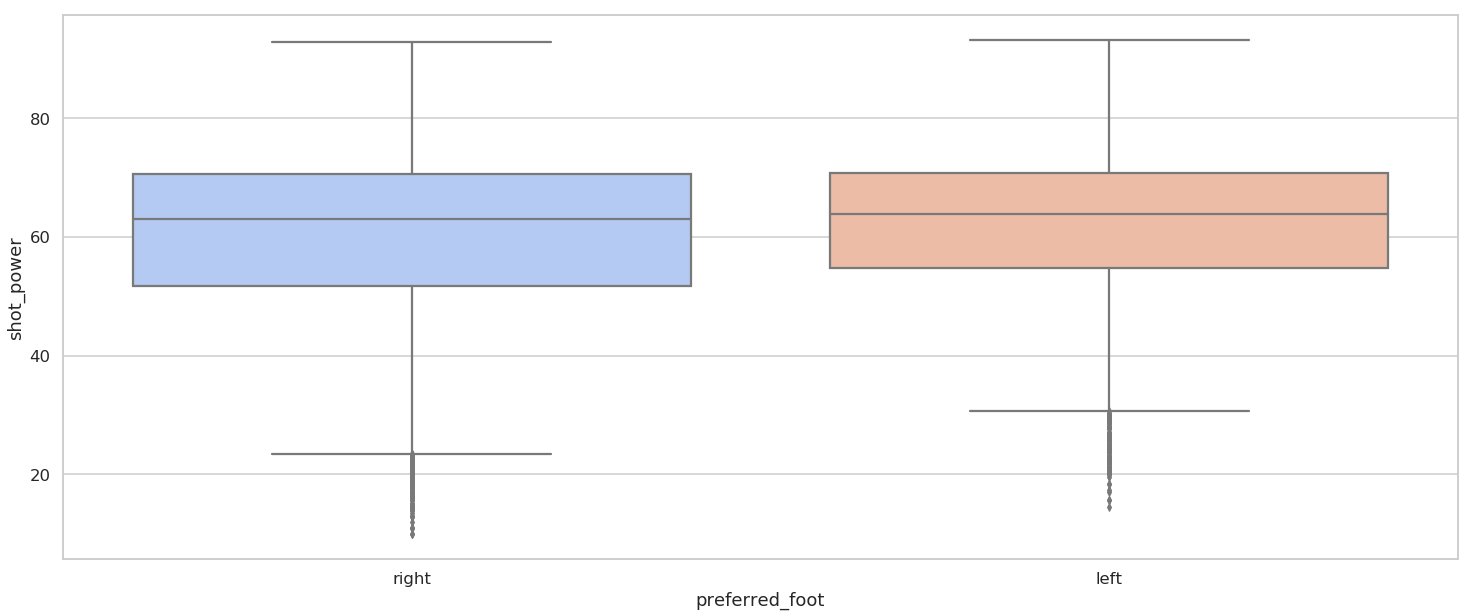

In [22]:
## Box plot para "shot_power" orientado a "preferred_foot"

plt.figure(figsize=(25,10))
sns.boxplot(x=df_player["preferred_foot"], y=df_player["shot_power"], palette="coolwarm")

In [27]:
## Z-Score para "shot_power"

shot_power_lefties_outliers = df_player[shot_power_zscore_outliers][df_player.preferred_foot=="left"][["player_name", "shot_power", "age", "height_m"]].sort_values("shot_power", ascending=True)
shot_power_righties_outliers = df_player[shot_power_zscore_outliers][df_player.preferred_foot=="right"][["player_name", "shot_power", "age", "height_m"]].sort_values("shot_power", ascending=True)

print("Estadisticos shot_power outliers:\n{}".format(df_player[shot_power_zscore_outliers]["shot_power"].describe()))
print("\nEstadisticos shot_power outliers preferred_foot->right:\n{}".format(shot_power_righties_outliers["shot_power"].describe()))
print("\nEstadisticos shot_power outliers preferred_foot->left:\n{}".format(shot_power_lefties_outliers["shot_power"].describe()))

Estadisticos shot_power outliers:
count    189.000000
mean      18.776614
std        2.597974
min        9.920000
25%       17.550000
50%       20.000000
75%       20.760000
max       21.420000
Name: shot_power, dtype: float64

Estadisticos shot_power outliers preferred_foot->right:
count    165.000000
mean      18.686848
std        2.671061
min        9.920000
25%       17.250000
50%       19.940000
75%       20.760000
max       21.400000
Name: shot_power, dtype: float64

Estadisticos shot_power outliers preferred_foot->left:
count    24.000000
mean     19.393750
std       1.960048
min      14.500000
25%      18.412500
50%      20.125000
75%      20.655000
max      21.420000
Name: shot_power, dtype: float64


**Interpretacion**

Podemos ver claramenmte que los jugadores zurdos tienen una serie de estadisticos de *shot_power*  mayor que los diestros: media, minimo, primer y segundo cuartil. Tambien podemos observar que la desviacion estandar es menor. Estas concluciones se pueden intepretar tanto del grafico boxplot como del *describe()* realizado sobre los valores de zscore.
Un valor que sin embargo comparten es el valor maximo de *shot_power*.

A modo de conclusion podemos decir que hay menos jugadores zurdos que patean con menos fuerza que derechos y a medida que el valor de *shot_power* comienza a incrementar, ambos grupos de jugadores (diestros y zurdos) se comienzan a parecer más y más.

#### Long Shots  - Outliers: *preferred_foot* oriented

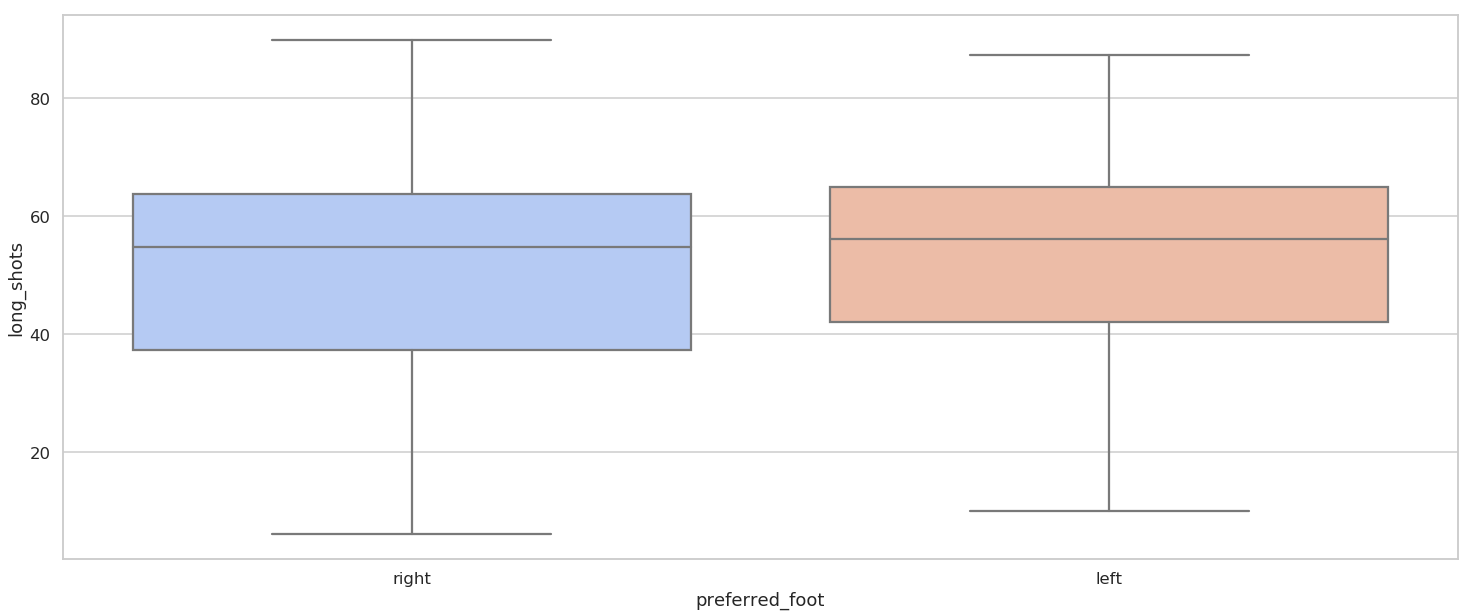

In [25]:
## Box plot para "long_shots" orientado a "preferred_foot"

plt.figure(figsize=(25,10))
sns.boxplot(x=df_player["preferred_foot"], y=df_player["long_shots"], palette="coolwarm")

In [28]:
## Z-Score para "long_shots"

long_shots_lefties_outliers = df_player[long_shots_zscore_outliers][df_player.preferred_foot=="left"][["player_name", "long_shots", "age", "height_m"]].sort_values("long_shots", ascending=True)
long_shots_righties_outliers = df_player[long_shots_zscore_outliers][df_player.preferred_foot=="right"][["player_name", "long_shots", "age", "height_m"]].sort_values("long_shots", ascending=True)

print("Estadisticos long_shots outliers:\n{}".format(df_player[long_shots_zscore_outliers]["long_shots"].describe()))
print("\nEstadisticos long_shots outliers preferred_foot->right:\n{}".format(long_shots_righties_outliers["long_shots"].describe()))
print("\nEstadisticos long_shots outliers preferred_foot->left:\n{}".format(long_shots_lefties_outliers["long_shots"].describe()))

Estadisticos long_shots outliers:
count    3.000000
mean     6.810000
std      0.733689
min      6.000000
25%      6.500000
50%      7.000000
75%      7.215000
max      7.430000
Name: long_shots, dtype: float64

Estadisticos long_shots outliers preferred_foot->right:
count    3.000000
mean     6.810000
std      0.733689
min      6.000000
25%      6.500000
50%      7.000000
75%      7.215000
max      7.430000
Name: long_shots, dtype: float64

Estadisticos long_shots outliers preferred_foot->left:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: long_shots, dtype: float64


**Interpretacion**

Podemos ver en el boxplot que los jugadores zurdos tienen un valor minimo de *long_shots* más alto que los diestros. Sin embargo, al comparar los valores en el otro extremo (los valores altos) vemos que los jugadores diestros tieneden a superar los valores de *long_shots* de los zurdos.

Otro dato no menor es que segun el z-score, no hay jugadores zurdos que puedan ser considerados outliers para la variable *long_shots*

> Ejercicio 4

Graficar la correlacion de los features de los jugadores.  
Calcular la correlacion entre los features 'Shot Power' y 'Long Shots' desglosando por la pierna habil.

> Ejercicio 5

Graficar la correlacion de los entre los features 'Weight' y 'Age' de los jugadores. Que conclusiones se obtienen?  
Graficar la correlacion de los entre los features 'Height' y 'Age' de los jugadores. Que conclusiones se obtienen?

> Ejercicio 6

Liga Europea con mayor cantidad de partidos

> Ejercicio 7

Top 10 de Equipos con mayor cantidad de goles convertidos: Total, Local y Visitante

> Ejercicio 8

Distribucion de Cantidad de goles convertidos: Total, Local y Visitante

> Ejercicio 9

Boxplot de Goles por Temporada

> Ejercicio 10

Resumen de Goles convertidos por Temporada: Total, Local y Visitante

> Ejercicio 11

Proporciones de los resultados de los partidos

### **Extra:** Si se les ocurre algún otra métrica que puedan extraer de los datasets, los invito a que la hagan.

---

**Comunicación de Resultados**

Se pide que toda esta información no quede plasmada solamente en un Jupyter Notebook, sino que se diagrame una comunicación en formato textual o interactivo (Google Docs, PDF o Markdown por ejemplo).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.